# import important libraries


In [29]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))
import pandas as pd
import re
from wordcloud import STOPWORDS,WordCloud
import matplotlib.pyplot as plt


from clean_tweets_dataframe import Clean_Tweets


# put paths in variables

In [100]:
CSV_PATH = "../processed_tweet_data.csv"
CLEANED_SAVE_PATH = "../cleanedPre_gl_tweeter_data.csv"

# Preprocessing

In [101]:
#function to read the processed data
def read_proccessed_data(CSV_PATH):
    try:    
        df = pd.read_csv(CSV_PATH)
        print("file read as csv")
        return df
    except FileNotFoundError:
        print("file not found")
    

In [102]:
## getting number of columns, row and column information
def get_data_info(tweet_df: pd.DataFrame):
    
    row_count, col_count = tweet_df.shape
    
    print(f"Number of rows: {row_count}")
    print(f"Number of columns: {col_count}")

    return tweet_df.info()


In [103]:
##then reading it

tweet_df = read_proccessed_data(CSV_PATH)
get_data_info(tweet_df)

file read as csv
Number of rows: 22000
Number of columns: 17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          22000 non-null  object 
 1   source              22000 non-null  object 
 2   original_text       22000 non-null  object 
 3   retweet_text        0 non-null      float64
 4   sentiment           22000 non-null  int64  
 5   polarity            22000 non-null  float64
 6   subjectivity        22000 non-null  float64
 7   lang                22000 non-null  object 
 8   favorite_count      22000 non-null  int64  
 9   retweet_count       22000 non-null  int64  
 10  original_author     22000 non-null  object 
 11  followers_count     22000 non-null  int64  
 12  friends_count       22000 non-null  int64  
 13  possibly_sensitive  6191 non-null   object 
 14  hashtags            19141 non-null  objec

# get the first 5 rows (6 including the field names)

In [104]:
tweet_df.head(6)

created_at  \
0  Sun Aug 07 22:31:20 +0000 2022   
1  Sun Aug 07 22:31:16 +0000 2022   
2  Sun Aug 07 22:31:07 +0000 2022   
3  Sun Aug 07 22:31:06 +0000 2022   
4  Sun Aug 07 22:31:04 +0000 2022   
5  Sun Aug 07 22:31:02 +0000 2022   

                                              source  \
0  <a href="http://twitter.com/download/android" ...   
1  <a href="http://twitter.com/download/android" ...   
2  <a href="http://twitter.com/download/android" ...   
3  <a href="http://twitter.com/download/android" ...   
4  <a href="http://twitter.com/download/iphone" r...   
5  <a href="http://twitter.com/download/android" ...   

                                       original_text  retweet_text  sentiment  \
0  RT @i_ameztoy: Extra random image (I):\n\nLets...           NaN          0   
1  RT @IndoPac_Info: #China's media explains the ...           NaN          0   
2  China even cut off communication, they don't a...           NaN         -1   
3  Putin to #XiJinping : I told you my friend, Ta...           NaN          1   
4  RT @ChinaUncensored: I’m sorry, I thought Taiw...           NaN          0   
5  RT @benedictrogers: We must not let this happe...           NaN          1   

       polarity  subjectivity lang  favorite_count  retweet_count  \
0 -1.250000e-01      0.190625   en               4              2   
1 -1.000000e-01      0.100000   en             691            201   
2  0.000000e+00      0.000000   en               0              0   
3  1.000000e-01      0.350000   en               0              0   
4 -6.938894e-18      0.556250   en            1521            381   
5  2.000000e-01      0.500000   en             116             36   

   original_author  followers_count  friends_count possibly_sensitive  \
0        i_ameztoy            20497           2621                NaN   
1            ZIisq           100327            272                NaN   
2        Fin21Free                0            392                NaN   
3        Fin21Free                0            392                NaN   
4   VizziniDolores            73448           2608                NaN   
5  GraceCh15554845           125806             54              False   

    hashtags    user_mentions                place  
0       City        i_ameztoy                  NaN  
1      China     IndoPac_Info                  NaN  
2  XiJinping      ZelenskyyUa          Netherlands  
3  XiJinping              NaN          Netherlands  
4        NaN  ChinaUncensored       Ayent, Schweiz  
5     Taiwan   benedictrogers  Melbourne, Victoria

# Checked the only language tweeted is english in the extracted data(all the 22k tweets)


In [105]:
tweet_df['lang'].value_counts()

en    22000
Name: lang, dtype: int64

In [106]:
#cleaning usernames and hashtags starting with '@' and links
def clean_text(text):
    hash_tag_removed = re.sub('(#[A-Za-z]+[A-Za-z0-9-_]+)', '', text)
    hash_tag_removed = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', text)

    removed_links = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text, flags=re.MULTILINE)
    cleaned = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', removed_links)
    cleaned = ''.join([i if ord(i) < 128 else ' ' for i in cleaned])
    
    cleaned = cleaned.strip()
    return cleaned

In [107]:
#function that extracts texts from the source link
#def extract_source_link(tag: str) -> str:
 #   link_math = re.search(r'href=[\'"]?([^\'" >]+)', tag)
  #  return link_math.group(1)

In [108]:
###Here, the processed data will be cleaned. The full_text column will be extracted 
###out to yeild the core message of the tweet. And will be stored in a new column called Clean_Text in CLEANED_SAVE_PATH

def preprocess_and_clean(df: pd.DataFrame, save=False) -> pd.DataFrame:
    
    Tweet_cleaner = Clean_Tweets(df)
    
    df = Tweet_cleaner.drop_duplicate()
    
    df = Tweet_cleaner.drop_unwanted_column()
    
    df = Tweet_cleaner.drop_unwanted_column()
    
    df = Tweet_cleaner.convert_to_datetime()
    
    df = Tweet_cleaner.convert_to_numbers()
    
    df = Tweet_cleaner.remove_non_english_tweets()
    
    
    df['clean_text']= df['original_text'].astype(str)
    
    # changing to lower case
    
    df['clean_text'] = df['clean_text'].apply(lambda x: x.lower())
    
    # replacing common panctuations.
    
    df['clean_text']  = df['clean_text'].map(lambda x: re.sub('[,\.!?]', '', x))
    
    # applying clean_text function that we defined
    
    df['clean_text']  = df['clean_text'].apply(clean_text)
    
    
     # changing hashtags and place to lowercase
    df['hashtags'] = df['hashtags'].apply(lambda x: str(x).lower())
    df['place'] = df['place'].apply(lambda x: str(x).lower())
    
    print("data cleaned...")
    df
    if save:
        try: 
            df.to_csv(CLEANED_SAVE_PATH, index=False)
            print('File Successfully Saved.!!!')
        
        except Exception:
            print("Save failed...")
    
    return df
            

            

In [109]:
preprocess_and_clean(tweet_df,True)  ###set saving to true

cleaning data...!!!


C:\Users\ERP\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


data cleaned...
File Successfully Saved.!!!


created_at  \
0     2022-08-07 22:31:20+00:00   
1     2022-08-07 22:31:16+00:00   
2     2022-08-07 22:31:07+00:00   
3     2022-08-07 22:31:06+00:00   
4     2022-08-07 22:31:04+00:00   
...                         ...   
21992 2022-08-06 18:03:29+00:00   
21993 2022-08-06 18:03:27+00:00   
21994 2022-08-06 18:03:27+00:00   
21995 2022-08-06 18:03:26+00:00   
21996 2022-08-06 18:03:25+00:00   

                                                  source  \
0      <a href="http://twitter.com/download/android" ...   
1      <a href="http://twitter.com/download/android" ...   
2      <a href="http://twitter.com/download/android" ...   
3      <a href="http://twitter.com/download/android" ...   
4      <a href="http://twitter.com/download/iphone" r...   
...                                                  ...   
21992  <a href="http://twitter.com/download/android" ...   
21993  <a href="http://twitter.com/download/android" ...   
21994  <a href="http://twitter.com/download/android" ...   
21995  <a href="http://twitter.com/download/android" ...   
21996  <a href="http://twitter.com/download/android" ...   

                                           original_text  retweet_text  \
0      RT @i_ameztoy: Extra random image (I):\n\nLets...           NaN   
1      RT @IndoPac_Info: #China's media explains the ...           NaN   
2      China even cut off communication, they don't a...           NaN   
3      Putin to #XiJinping : I told you my friend, Ta...           NaN   
4      RT @ChinaUncensored: I’m sorry, I thought Taiw...           NaN   
...                                                  ...           ...   
21992  RT @IndoPac_Info: A good infographic of #China...           NaN   
21993  RT @IndoPac_Info: A good infographic of #China...           NaN   
21994                @Reuters Thanks #Pelosi smart move.           NaN   
21995  RT @IndoPac_Info: #Taiwan people's Desire for ...           NaN   
21996  RT @IndoPac_Info: #Taiwan people's Desire for ...           NaN   

       sentiment      polarity  subjectivity lang  favorite_count  \
0              0 -1.250000e-01      0.190625   en               4   
1              0 -1.000000e-01      0.100000   en             691   
2             -1  0.000000e+00      0.000000   en               0   
3              1  1.000000e-01      0.350000   en               0   
4              0 -6.938894e-18      0.556250   en            1521   
...          ...           ...           ...  ...             ...   
21992          1  7.000000e-01      0.600000   en             507   
21993          1  7.000000e-01      0.600000   en             507   
21994          1  2.071429e-01      0.421429   en               0   
21995          1  5.000000e-02      0.350000   en             199   
21996          1  5.000000e-02      0.350000   en             199   

       retweet_count original_author  followers_count  friends_count  \
0                  2       i_ameztoy            20497           2621   
1                201           ZIisq           100327            272   
2                  0       Fin21Free                0            392   
3                  0       Fin21Free                0            392   
4                381  VizziniDolores            73448           2608   
...              ...             ...              ...            ...   
21992            183       VandelayT           100360            471   
21993            183      sashalenik           100360           1751   
21994              0    ZeitounRimal                0              0   
21995             67   SazzyCowgirl1           100360            317   
21996             67       VandelayT           100360            471   

      possibly_sensitive   hashtags    user_mentions             place  \
0                    NaN       city        i_ameztoy               nan   
1                    NaN      china     IndoPac_Info               nan   
2                    NaN  xijinping      ZelenskyyUa       netherlands   


# EXPLORATION

In [110]:
## using the functions in this class, The tweeter data was explored.
# Instantiation of a dataframe is done

class TweeterDataExplorator:
    
    def __init__(self, df):
        
        self.df = df
    
    
    def read_head(self):
        return self.df.head()
    
    # returning the number of rows columns and column information
    def get_info(self):
        row_count, col_count = self.df.shape
    
        print(f"Number of rows: {row_count}")
        print(f"Number of columns: {col_count}")

        return (row_count, col_count), self.df.info()
    
    # gets number of distnict values in a given coumn
    def get_count(self, column_name):
        return self.df[column_name].value_counts()
    
    # returns the number of negative polarities, neutral polarities and positive polarities in a dict
    def get_polarities_count(self):
        postive_count = tweet_df[tweet_df['polarity'] > 0].shape[0]
        neutral_count = tweet_df[tweet_df['polarity'] == 0].shape[0]
        negative_count = tweet_df[tweet_df['polarity'] < 0].shape[0]
        
        return {"postive": postive_count, "neutral": neutral_count, "negative": negative_count}

        
    # constructs a hashtag data frame for every tweets and returns it
    def get_hash_tag_df(self):        
        hash_tags = self.df.clean_text.apply(self.__find_hashtags)
        
        flattened_hash_tags = []
        
        for hash_tag_list in hash_tags:
            for hash_tag in hash_tag_list:
                flattened_hash_tags.append(hash_tag)
        
        hashtag_df = pd.DataFrame(columns=['hashtag'])
        hashtag_df['hashtag'] = flattened_hash_tags
        
        return hashtag_df
    
    #  this returns the value count of top hash tags used in a data frame
    # if top is not specifed, it returns with a value count of every hashtag used
    def most_used_hash_tag(self, top=None):
        return self.get_hash_tag_df()['hashtag'].value_counts().head(top)
        
    def visualze_polarity(self):
        return 
    
    # returns value count of top language used
    # if top is not specifed, it returns with a value count of language of every language used
    def most_used_language(self, top=None):
        return self.df['lang'].value_counts().head(top)
    
    # returns value count of top users tweeted
    # if top is not specifed, it returns with a value count of language of every users who tweeted
    def authors(self, top=None): 
        return self.df['original_author'].value_counts().head(top)
    
    
    def most_retweeted_tweet(self):
        pass
    
    # private function that finds hash tags from a text
    def __find_hashtags(self, tweet):
        
        try:
            return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)
        except:
            return []

In [111]:
cleaned_tweet_df = read_proccessed_data(CLEANED_SAVE_PATH)
tweeterDataExplorator = TweeterDataExplorator(cleaned_tweet_df)

file read as csv


In [112]:
cleaned_tweet_df

created_at  \
0      2022-08-07 22:31:20+00:00   
1      2022-08-07 22:31:16+00:00   
2      2022-08-07 22:31:07+00:00   
3      2022-08-07 22:31:06+00:00   
4      2022-08-07 22:31:04+00:00   
...                          ...   
21992  2022-08-06 18:03:29+00:00   
21993  2022-08-06 18:03:27+00:00   
21994  2022-08-06 18:03:27+00:00   
21995  2022-08-06 18:03:26+00:00   
21996  2022-08-06 18:03:25+00:00   

                                                  source  \
0      <a href="http://twitter.com/download/android" ...   
1      <a href="http://twitter.com/download/android" ...   
2      <a href="http://twitter.com/download/android" ...   
3      <a href="http://twitter.com/download/android" ...   
4      <a href="http://twitter.com/download/iphone" r...   
...                                                  ...   
21992  <a href="http://twitter.com/download/android" ...   
21993  <a href="http://twitter.com/download/android" ...   
21994  <a href="http://twitter.com/download/android" ...   
21995  <a href="http://twitter.com/download/android" ...   
21996  <a href="http://twitter.com/download/android" ...   

                                           original_text  retweet_text  \
0      RT @i_ameztoy: Extra random image (I):\n\nLets...           NaN   
1      RT @IndoPac_Info: #China's media explains the ...           NaN   
2      China even cut off communication, they don't a...           NaN   
3      Putin to #XiJinping : I told you my friend, Ta...           NaN   
4      RT @ChinaUncensored: I’m sorry, I thought Taiw...           NaN   
...                                                  ...           ...   
21992  RT @IndoPac_Info: A good infographic of #China...           NaN   
21993  RT @IndoPac_Info: A good infographic of #China...           NaN   
21994                @Reuters Thanks #Pelosi smart move.           NaN   
21995  RT @IndoPac_Info: #Taiwan people's Desire for ...           NaN   
21996  RT @IndoPac_Info: #Taiwan people's Desire for ...           NaN   

       sentiment      polarity  subjectivity lang  favorite_count  \
0              0 -1.250000e-01      0.190625   en               4   
1              0 -1.000000e-01      0.100000   en             691   
2             -1  0.000000e+00      0.000000   en               0   
3              1  1.000000e-01      0.350000   en               0   
4              0 -6.938894e-18      0.556250   en            1521   
...          ...           ...           ...  ...             ...   
21992          1  7.000000e-01      0.600000   en             507   
21993          1  7.000000e-01      0.600000   en             507   
21994          1  2.071429e-01      0.421429   en               0   
21995          1  5.000000e-02      0.350000   en             199   
21996          1  5.000000e-02      0.350000   en             199   

       retweet_count original_author  followers_count  friends_count  \
0                  2       i_ameztoy            20497           2621   
1                201           ZIisq           100327            272   
2                  0       Fin21Free                0            392   
3                  0       Fin21Free                0            392   
4                381  VizziniDolores            73448           2608   
...              ...             ...              ...            ...   
21992            183       VandelayT           100360            471   
21993            183      sashalenik           100360           1751   
21994              0    ZeitounRimal                0              0   
21995             67   SazzyCowgirl1           100360            317   
21996             67       VandelayT           100360            471   

      possibly_sensitive   hashtags    user_mentions             place  \
0                    NaN       city        i_ameztoy               NaN   
1                    NaN      china     IndoPac_Info               NaN   
2                    NaN  xijinping      ZelenskyyUa       neth

In [114]:
#This is done before. getting column info but on the cleaned data
tweeterDataExplorator.get_info()

Number of rows: 21997
Number of columns: 18
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21997 entries, 0 to 21996
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          21997 non-null  object 
 1   source              21997 non-null  object 
 2   original_text       21997 non-null  object 
 3   retweet_text        0 non-null      float64
 4   sentiment           21997 non-null  int64  
 5   polarity            21997 non-null  float64
 6   subjectivity        21997 non-null  float64
 7   lang                21997 non-null  object 
 8   favorite_count      21997 non-null  int64  
 9   retweet_count       21997 non-null  int64  
 10  original_author     21997 non-null  object 
 11  followers_count     21997 non-null  int64  
 12  friends_count       21997 non-null  int64  
 13  possibly_sensitive  6190 non-null   object 
 14  hashtags            19138 non-null  object 
 15  user_ment

((21997, 18), None)

In [115]:
#Polarity is explored
polaritites_count = tweeterDataExplorator.get_polarities_count()
print(f"postive: { polaritites_count['postive'] }")
print(f"negative: { polaritites_count['negative'] }")
print(f"neutal: { polaritites_count['neutral'] }")

postive: 8182
negative: 4833
neutal: 8982


In [116]:
top_ten_hash_tags_used = tweeterDataExplorator.most_used_hash_tag(5)
top_ten_hash_tags_used

#taiwan               14328
#china                 6378
#pelosi                2557
#us                     875
#chinataiwancrisis      854
Name: hashtag, dtype: int64

In [117]:
top_ten_authors = tweeterDataExplorator.authors(5)
top_ten_authors

TrumpThuan        116
CGMeifangZhang     65
AarianNewsX        59
Lin73324756        48
Bin20211001        46
Name: original_author, dtype: int64

# Data Visualization

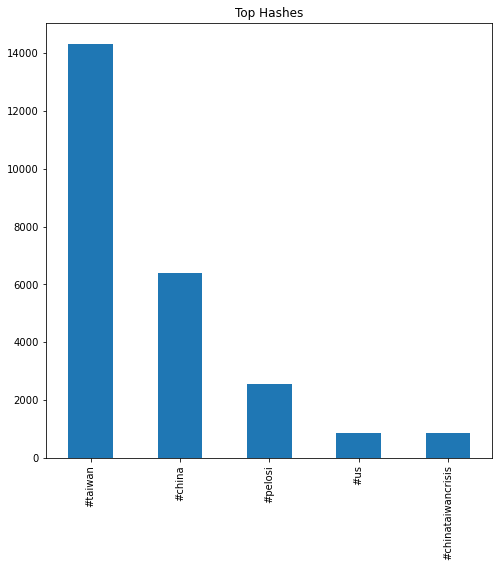

In [120]:
top_ten_hash_tags_used.plot(kind="bar", title="Top Hashes", figsize=[8, 8])

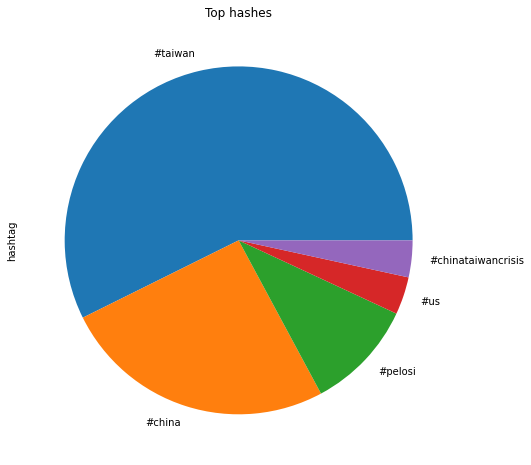

In [121]:
top_ten_hash_tags_used.plot(kind="pie", title="Top hashes", figsize=[8, 8])

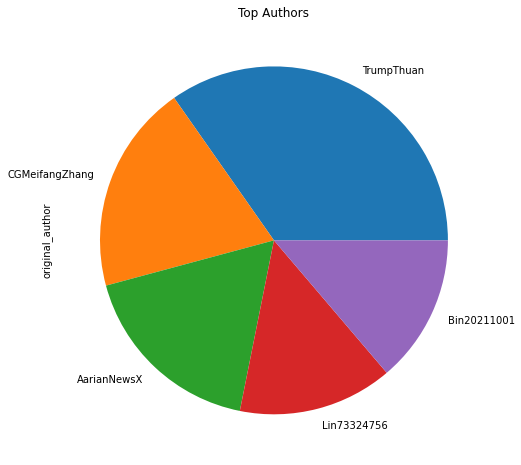

In [122]:
top_ten_authors.plot(kind="pie", title="Top Authors", figsize=[8, 8])

In [123]:
#Show the clean text with its indices
clean_text_df = pd.DataFrame(cleaned_tweet_df['clean_text'])
clean_text_df.dropna(inplace=True)
clean_text_df

clean_text
0      rt : extra random image (i):\n\nlets focus in ...
1      rt : #china's media explains the military reas...
2      china even cut off communication they don't an...
3      putin to #xijinping : i told you my friend tai...
4      rt : i m sorry i thought taiwan was an indepen...
...                                                  ...
21992  rt : a good infographic of #china's missile la...
21993  rt : a good infographic of #china's missile la...
21994                          thanks #pelosi smart move
21995  rt : #taiwan people's desire for unification w...
21996  rt : #taiwan people's desire for unification w...

[21997 rows x 1 columns]

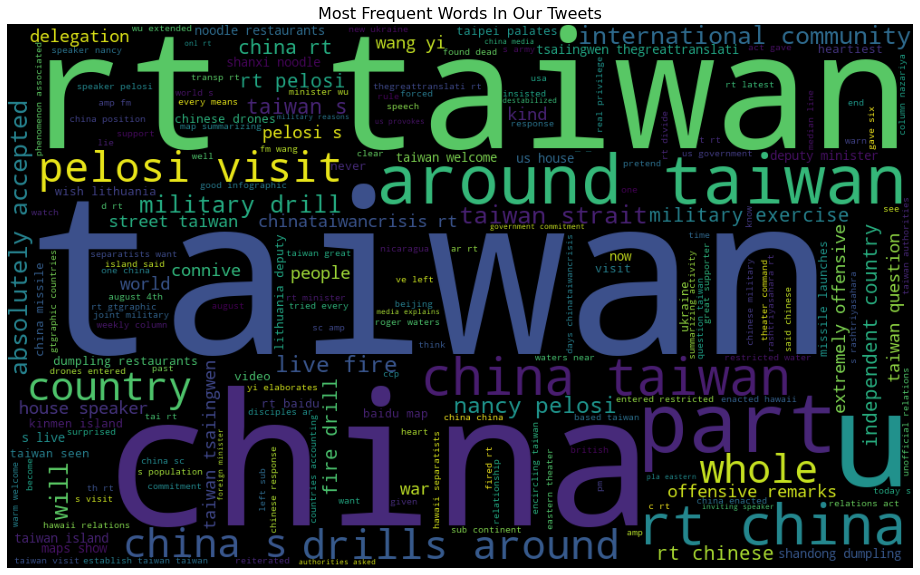

In [124]:
###WordCloud
plt.figure(figsize=(20, 10))
plt.imshow(WordCloud(width=1000,height=600,stopwords=STOPWORDS).generate(' '.join(clean_text_df.clean_text)))
plt.axis('off')
plt.title('Most Frequent Words In Our Tweets',fontsize=16)
plt.show()